In [1]:
# Import needed packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reading data
data = pd.read_csv("FuelConsumption.csv")
# Take a look at the dataset
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Data Exploration
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# Select some features to explore more
sub_data = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
sub_data.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


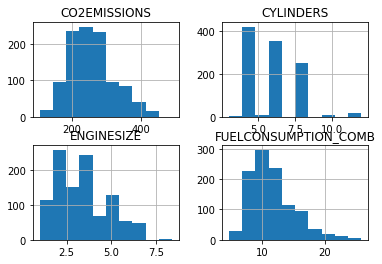

In [5]:
# Plot each of these features above
sub_data.hist()
plt.show()

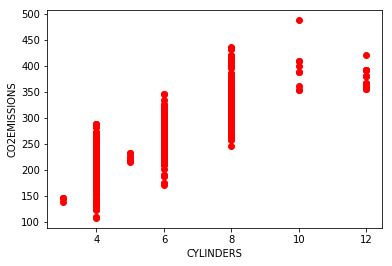

In [6]:
# Plot each of these features above vs the Emission, to see how linear is their relation
plt.scatter(sub_data.CYLINDERS, data['CO2EMISSIONS'], color='red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

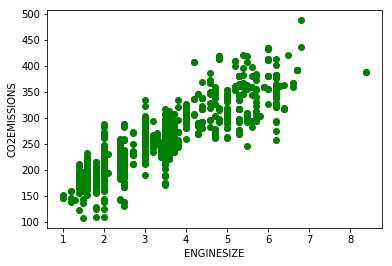

In [7]:
# Explore another relation
plt.scatter(sub_data.ENGINESIZE, data.CO2EMISSIONS, color='green')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [8]:
# Create train and test dataset
mask = np.random.rand(len(data)) < 0.8
train = sub_data[mask]
test = sub_data[~mask]


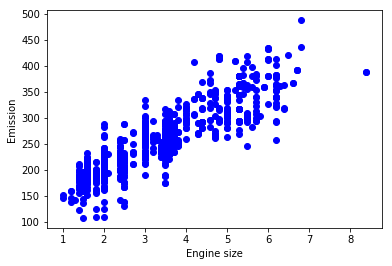

In [9]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
# Create model
linear_regression = LinearRegression()
X_train = train[['ENGINESIZE']]
y_train = train[['CO2EMISSIONS']]
linear_regression.fit(X_train, y_train)

# The coefficients
# Coefficient and Intercept in the simple linear regression are the parameters of the fit line.
print('Coefficients: ', linear_regression.coef_)
print('Intercept: ', linear_regression.intercept_)

Coefficients:  [[39.88238134]]
Intercept:  [123.46235196]


Text(0, 0.5, 'Emission')

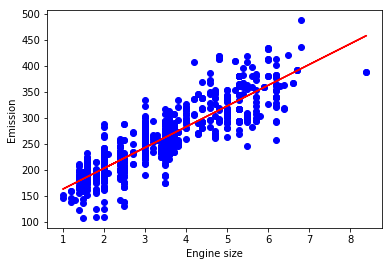

In [11]:
# Plot the fit line over the data
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, linear_regression.coef_[0][0]*X_train + linear_regression.intercept_[0], 'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [12]:
# Evaluation
X_test = test[['ENGINESIZE']]
y_test = test[['CO2EMISSIONS']]
y_test_predicted = linear_regression.predict(X_test)

print("Mean absolute error:  %.2f" % np.mean(np.absolute(y_test - y_test_predicted)))
print ("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_test_predicted)) # equivalent to np.mean((y_test - y_test_predicted) ** 2)
print("R2-score: %.2f" % r2_score(y_test, y_test_predicted))

Mean absolute error:  23.34
Mean squared error (MSE): 954.81
R2-score: 0.73


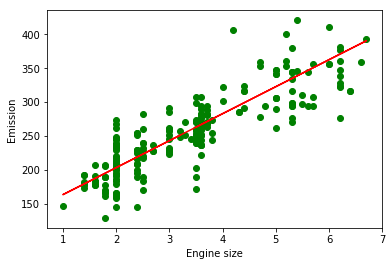

In [13]:
# Plot the fit line on test data
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, linear_regression.coef_[0][0]*X_test + linear_regression.intercept_[0], 'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()